# **Prediction of Diabetes using Suitable ML Model**

***Importing Required Packages***

In [27]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split as TTS
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler as SS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.svm import SVC 
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.metrics import accuracy_score as a_s, precision_score as p_s, confusion_matrix as c_m, classification_report as c_r
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score as CVS
from sklearn.metrics import roc_auc_score as RAS
from sklearn.naive_bayes import GaussianNB as NB
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier as RFC
import warnings
warnings.filterwarnings("ignore")

***Data Preprocessing***

In [28]:
data = pd.read_csv("/content/Diabetes Database.csv")

pred = dict([(1, 'has Diabetes'), (0, 'is Free from Diabetes')]) 
pred

{0: 'is Free from Diabetes', 1: 'has Diabetes'}

In [29]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


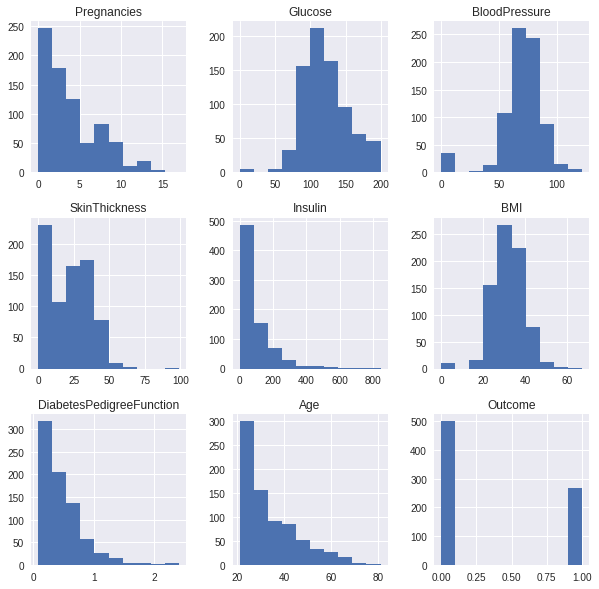

In [31]:
data.hist(figsize=(10,10))
plt.show()

In [32]:
z_scores = zscore(data.iloc[:,:-1])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_outlir = data[filtered_entries]
data_outlir.shape

(688, 9)

In [33]:
data_outlir['Outcome'].value_counts()

0    461
1    227
Name: Outcome, dtype: int64

In [34]:
scaler = MMS()
data_std = scaler.fit_transform(data_outlir.iloc[:,:-1])
data_std = pd.DataFrame(data_std)
data_std.shape

(688, 8)

***Exploratory Data Analysis***

In [35]:
data_va = data_std.var(axis= 0)
data_vas = data_va.sort_values(ascending=False)
y = data_vas.values 
x = range(len(y))

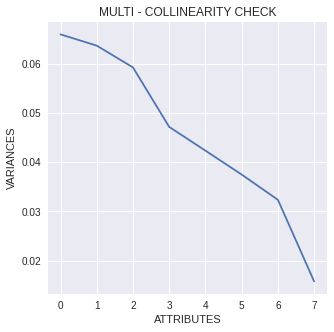

In [36]:
plt.figure(figsize = (5,5))
plt.plot(x, y)
plt.title("MULTI - COLLINEARITY CHECK")
plt.xlabel("ATTRIBUTES")
plt.ylabel("VARIANCES")
plt.show()

##### **Splitting data into Train and Test sets**

In [37]:
X = data_outlir.iloc[:, :-1].values
Y = data_outlir['Outcome'].values

X_train, X_test, y_train, y_test = TTS(X, Y, test_size=0.33, random_state=42)

## **To Check for Suitable ML Models**

In [38]:
lr = LR(C = 0.2)
clf1 = lr.fit(X_train, y_train)

In [39]:
nb = NB()
clf2 = nb.fit(X_train, y_train)

In [40]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
clf3 = dt.fit(X_train, y_train)

In [41]:
rf = RFC(max_depth=5, random_state=0, n_estimators=100)
clf4 = rf.fit(X_train, y_train)

In [42]:
svm = SVC(probability=True)
clf5 = svm.fit(X_train, y_train)

In [43]:
knn = KNN(n_neighbors = 3, metric = 'euclidean', p = 2)
clf6 = knn.fit(X_train, y_train)

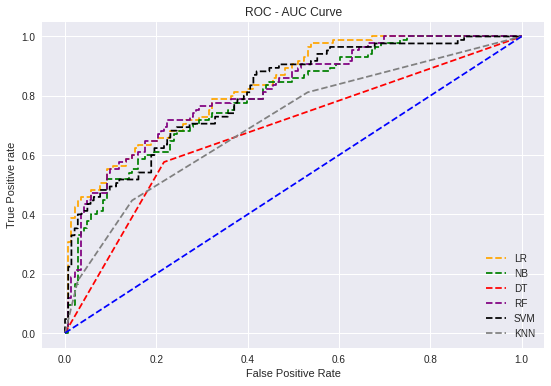

In [44]:
pred_prob1 = clf1.predict_proba(X_test)
pred_prob2 = clf2.predict_proba(X_test)
pred_prob3 = clf3.predict_proba(X_test)
pred_prob4 = clf4.predict_proba(X_test)
pred_prob5 = clf5.predict_proba(X_test)
pred_prob6 = clf6.predict_proba(X_test)

from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.figure(figsize = (9, 6))

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='LR')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='NB')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='DT')
plt.plot(fpr4, tpr4, linestyle='--',color='purple', label='RF')
plt.plot(fpr5, tpr5, linestyle='--',color='black', label='SVM')
plt.plot(fpr6, tpr6, linestyle='--',color='grey', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC - AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc = 'lower right')
plt.savefig('ROC')
plt.show()

***Model Optimization***

LR   : 0.770 (0.046)
NB   : 0.750 (0.027)
DT   : 0.680 (0.042)
RF   : 0.772 (0.033)
SVM   : 0.733 (0.056)
KNN   : 0.670 (0.048)


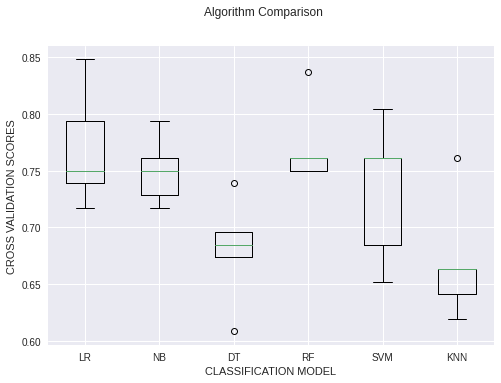

In [45]:
from sklearn import model_selection
models = []
models.append(('LR', lr))
models.append(('NB', nb))
models.append(('DT', dt))
models.append(('RF', rf))
models.append(('SVM', svm))
models.append(('KNN', knn))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=5)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s   : %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xlabel("CLASSIFICATION MODEL")
plt.ylabel("CROSS VALIDATION SCORES")
ax.set_xticklabels(names)
plt.show()

# **Best Suitable Model: Random Forest**

### **Random Forest Classifier Function**

In [46]:
import numpy as np
from collections import Counter

def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
    def is_leaf_node(self):
        return self.value is not None

class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None
    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)
    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])
    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))
        if (depth >= self.max_depth
                or n_labels == 1
                or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)
        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feat, best_thresh, left, right)
    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold
        return split_idx, split_thresh
    def _information_gain(self, y, X_column, split_thresh):
        parent_entropy = entropy(y)
        left_idxs, right_idxs = self._split(X_column, split_thresh)
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r
        ig = parent_entropy - child_entropy
        return ig
    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs
    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)
    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, n_samples, replace=True)
    return X[idxs], y[idxs]

def most_common_label(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common

class RandomForest:
    
    def __init__(self, n_trees=10, min_samples_split=2,
                 max_depth=100, n_feats=None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.trees = []
    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(min_samples_split=self.min_samples_split,
                max_depth=self.max_depth, n_feats=self.n_feats)
            X_samp, y_samp = bootstrap_sample(X, y)
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)
    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)

## **Prediction using the Classifier**

In [47]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

clf = RandomForest(n_trees=50, max_depth=5)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy(y_test, y_pred)

print ("Accuracy:", acc)

Accuracy: 0.7587719298245614


Classification Report

In [48]:
print('CLASSIFICATION REPORT\n\n', c_r(y_test, y_pred))

CLASSIFICATION REPORT

               precision    recall  f1-score   support

           0       0.77      0.88      0.82       143
           1       0.73      0.55      0.63        85

    accuracy                           0.76       228
   macro avg       0.75      0.72      0.73       228
weighted avg       0.76      0.76      0.75       228



Confusion Matrix

In [49]:
cm1 = c_m(y_test, y_pred)
print("CONFUSION MATRIX : \n\n",cm1)

CONFUSION MATRIX : 

 [[126  17]
 [ 38  47]]


## **Test Cases**

In [50]:
test_case_1 = clf.predict([[6, 148,	72,	35,	0, 33.6, 0.627, 50]])

print('The Patient', ''.join(map(str, pred[test_case_1[0]])))

The Patient has Diabetes


In [51]:
test_case_2 = clf.predict([[1, 85, 66, 29, 0,	26.6,	0.351, 31, 0]])

print('The Patient', ''.join(map(str, pred[test_case_2[0]])))

The Patient is Free from Diabetes
